In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,Date,Consumption
0,2009-07-01,108637.2762
1,2009-07-02,108638.8474
2,2009-07-03,108633.8275
3,2009-07-04,109082.4222
4,2009-07-05,109071.7580


In [5]:
df.tail()

,Date,Consumption
3795,2020-08-29,117248.8005
3796,2020-08-30,117172.7614
3797,2020-08-31,117165.0869
3798,2020-09-01,116737.0168
3799,2020-09-02,116047.5641


In [6]:
## Cleaning up the data
df.columns=["Date","Consumption"]
df.head()

,Date,Consumption
0,2009-07-01,108637.2762
1,2009-07-02,108638.8474
2,2009-07-03,108633.8275
3,2009-07-04,109082.4222
4,2009-07-05,109071.7580


In [7]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [8]:
df.tail()

,Date,Consumption
3795,2020-08-29,117248.8005
3796,2020-08-30,117172.7614
3797,2020-08-31,117165.0869
3798,2020-09-01,116737.0168
3799,2020-09-02,116047.5641


In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.tail()

,Date,Consumption
3795,2020-08-29,117248.8005
3796,2020-08-30,117172.7614
3797,2020-08-31,117165.0869
3798,2020-09-01,116737.0168
3799,2020-09-02,116047.5641


In [11]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.head()

,Date,Consumption
0,2009-07-01,108637.2762
1,2009-07-02,108638.8474
2,2009-07-03,108633.8275
3,2009-07-04,109082.4222
4,2009-07-05,109071.7580


In [13]:
df.set_index('Date',inplace=True)

In [14]:
df.head()

,Consumption
Date,
2009-07-01,108637.2762
2009-07-02,108638.8474
2009-07-03,108633.8275
2009-07-04,109082.4222
2009-07-05,109071.7580


In [15]:
df.describe()

,Consumption
count,3798.000000
mean,105436.718342
std,9760.549729
min,82045.440120
25%,97699.407497
50%,103011.672550
75%,113081.175875
max,135780.426500


In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Consumption'])

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df['Consumption'])

ADF Test Statistic : -6.057608529011952
p-value : 1.2343604292346924e-07
#Lags Used : 16
Number of Observations Used : 3781
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [20]:
df['Consumption First Difference'] = df['Consumption'] - df['Consumption'].shift(1)

In [21]:
df['Consumption'].shift(1)

Date
2009-07-01            NaN
2009-07-02    108637.2762
2009-07-03    108638.8474
2009-07-04    108633.8275
2009-07-05    109082.4222
                 ...     
2020-08-29    117736.9939
2020-08-30    117248.8005
2020-08-31    117172.7614
2020-09-01    117165.0869
2020-09-02    116737.0168
Name: Consumption, Length: 3798, dtype: float64

In [22]:
df['Seasonal First Difference']=df['Consumption']-df['Consumption'].shift(12)

In [23]:
df.head(14)

,Consumption,Consumption First Difference,Seasonal First Difference
Date,,,
2009-07-01,108637.2762,NaN,NaN
2009-07-02,108638.8474,1.5712,NaN
2009-07-03,108633.8275,-5.0199,NaN
2009-07-04,109082.4222,448.5947,NaN
2009-07-05,109071.7580,-10.6642,NaN
2009-07-06,109071.7580,0.0000,NaN
2009-07-07,109373.0604,301.3024,NaN
2009-07-08,109982.4894,609.4290,NaN
2009-07-09,110118.0528,135.5634,NaN


In [24]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.350296861383179
p-value : 1.0101239560798337e-10
#Lags Used : 28
Number of Observations Used : 3757
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

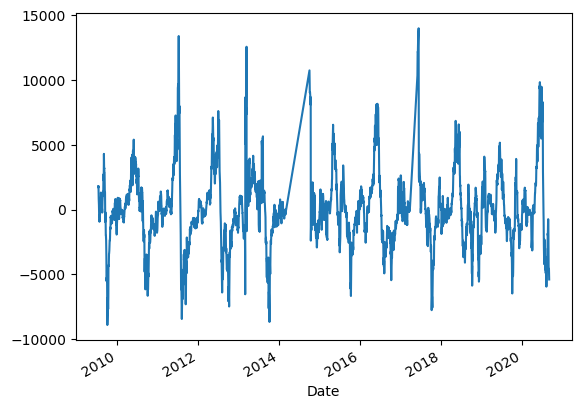

In [25]:
df['Seasonal First Difference'].plot()

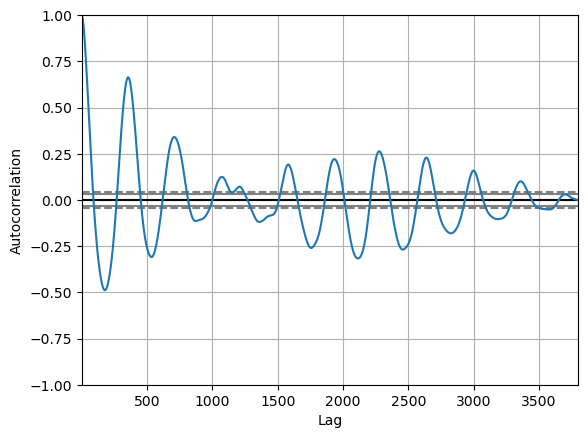

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Consumption'])
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

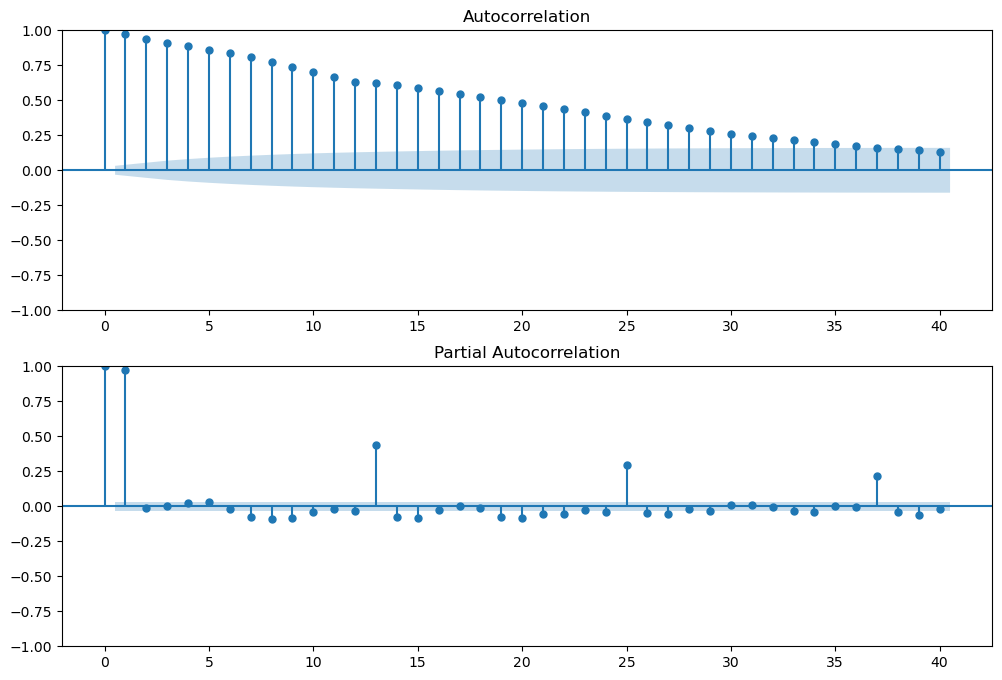

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [29]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
import statsmodels.api as sm

In [30]:
model=sm.tsa.arima.ARIMA(df['Consumption'],order=(1,1,1))
model_fit=model.fit()

C:\Users\SPIRO-PYTHON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SPIRO-PYTHON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SPIRO-PYTHON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                 3798
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -29121.117
Date:                Sat, 01 Jul 2023   AIC                          58248.235
Time:                        17:19:37   BIC                          58266.960
Sample:                             0   HQIC                         58254.890
                               - 3798                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9604      0.007    128.257      0.000       0.946       0.975
ma.L1         -0.9148      0.010    -91.531      0.000      -0.934      -0.895
sigma2      2.633e+05    570.348    461.678      0.000    2.62e+05    2.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):          15553487.87
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            11.66
Prob(H) (two-sided):                  0.00   Kurtosis:                       315.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

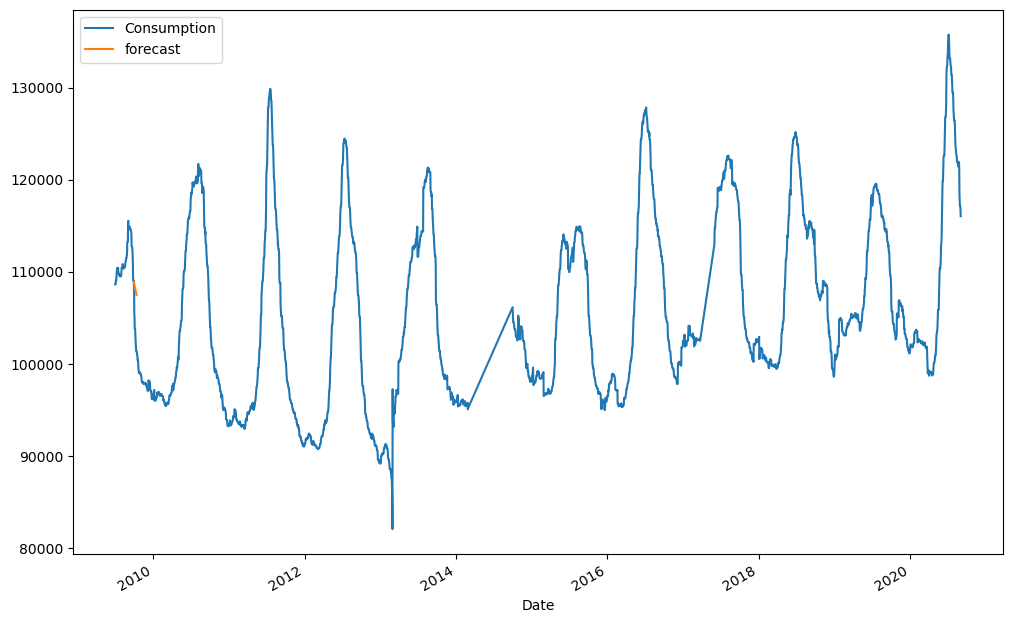

In [32]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Consumption','forecast']].plot(figsize=(12,8))